In [1]:
import numpy as np
import cv2
from colorthief import ColorThief
import io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test_images = ['/Users/Rabbit/Downloads/china_test.jpg', 
               '/Users/Rabbit/Downloads/vilnius_test.jpg', 
               '/Users/Rabbit/Downloads/spices_test.jpg']

In [3]:
loc_fashion_images = ['/Users/Rabbit/capstone/materials/scrape_fashion_2/2003.86.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2006.44.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2006.56.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2006.56.2.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2007.30.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2008.4.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/2010.98.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/74.32.4.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/76.64.1.png', 
                     '/Users/Rabbit/capstone/materials/scrape_fashion_2/80.1.4.png']

In [4]:
pic_test = loc_fashion_images[1]

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def display_color(color_arr):
    return plt.imshow([(color_arr)])

def convert_rgb_to_percent(pal_test):
    for color in pal_test:
        for rgb_val in color:
            color_val.append(rgb_val/255)
        color_arr.append(tuple(color_val))
        color_val.clear()

    return color_arr

def display_palette(img):
    pass

In [6]:
# !ls ../../dyanye_clothing_era_classifier/

README.md       geckodriver.log notebook        src             todo


In [14]:
# img = cv2.imread('/Users/Rabbit/Downloads/china_test.jpg')
# img.shape

In [ ]:
Z = img.reshape((-1, 3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 7
ret, label, center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

# cv2.imshow('res2',res2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# center

In [16]:
pic_test = test_images[1]

In [17]:
colorthief = ColorThief(pic_test)

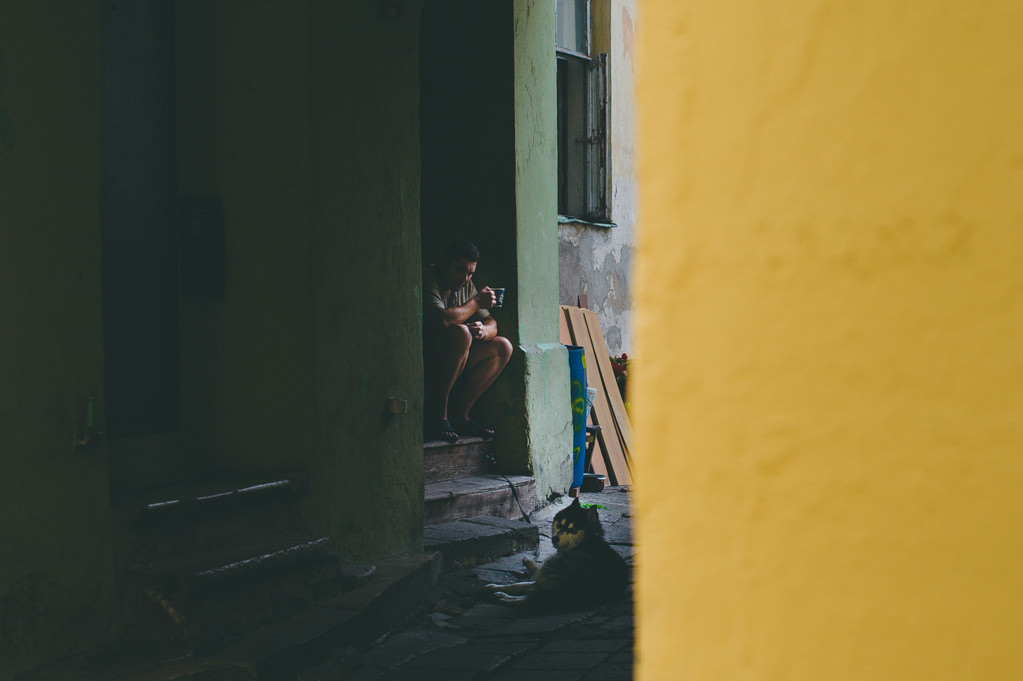

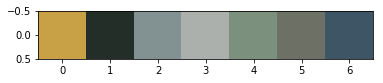

In [18]:
palette_list = []
color_arr = []
color_val = []

# pal_test.clear
pal_test = colorthief.get_palette(color_count=7, quality=1)
pal_test

# color_arr.clear
color_arr = convert_rgb_to_percent(pal_test)

display_color(color_arr)

colorthief.image

In [19]:
pal_test

[(200, 161, 70),
 (36, 46, 40),
 (130, 146, 146),
 (171, 176, 172),
 (123, 145, 125),
 (109, 112, 101),
 (62, 85, 101)]

In [20]:
color_arr

[(0.7843137254901961, 0.6313725490196078, 0.27450980392156865),
 (0.1411764705882353, 0.1803921568627451, 0.1568627450980392),
 (0.5098039215686274, 0.5725490196078431, 0.5725490196078431),
 (0.6705882352941176, 0.6901960784313725, 0.6745098039215687),
 (0.4823529411764706, 0.5686274509803921, 0.49019607843137253),
 (0.42745098039215684, 0.4392156862745098, 0.396078431372549),
 (0.24313725490196078, 0.3333333333333333, 0.396078431372549)]

In [23]:
centroid_lst = np.array(pal_test)

In [24]:
def centroid_cos_similar(pixels, centroid):
    numerator = (pixels * centroid).sum(axis=1)
    denominator = (np.linalg.norm(pixels, axis=1) * np.linalg.norm(centroid))
    return numerator / denominator

In [25]:
lst = []
for centroid in centroid_lst:
    lst.append(centroid_cos_similar(img.reshape(-1, 3), centroid))

/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [32]:
centroid_argmax = np.array(lst).argmax(axis=0)

In [33]:
cos_sim_test = np.unique(centroid_argmax, return_counts=True)
cos_sim_test

(array([0, 1, 2, 3, 4, 5, 6]),
 array([ 15705,   1879,  11487,  46189,    391, 193459, 270890]))

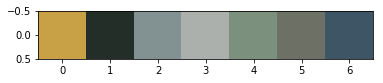

In [34]:
plt.imshow([(centroid_lst).astype('uint8')])

In [ ]:
# import numpy as np

# def centroid_euclidean_dist(pixels, centroid):
#     dist = np.linalg.norm(pixels - centroid, axis=1)
# #     (np.linalg.norm(pixels, axis=1) * np.linalg.norm(centroid))
#     return dist

In [ ]:
# lst = []
# for centroid in centroid_lst:
#     lst.append(centroid_euclidean_dist(img.reshape(-1, 3), centroid))

In [ ]:
# lst

In [ ]:
# centroid_argmin = np.array(lst).argmin(axis=0)

In [ ]:
# np.unique(centroid_argmin, return_counts=True)

In [ ]:
# centroid_dict

In [ ]:
# plt.imshow([(centroid_lst[]).astype('uint8')])

In [ ]:
# import colorgram

# img = ('/Users/Rabbit/capstone/materials/scrape_fashion_2/76.64.1.png')

In [ ]:
# colors = colorgram.extract(img, 6)

In [ ]:
# colors[0]